In [139]:
%matplotlib inline
import math as m; import numpy as np; import matplotlib.pyplot as plt; import matplotlib.colors
import pandas as pd; import os; import pathlib; import string; import datetime; import h5py

directory = 'D:\\Jupiter_satellites_data\\'

In [140]:
# moon data
sat_list = ['Io', 'Europa', 'Ganymede']
d_eq_VAR = [50, 50, 25]

RG = 0.0377 # Ganymede radius in RJ
RE = 0.0223 # Europa radius in RJ
RI = 0.0261 # Io radius in RJ

R_list = np.array([RI, RE, RG])
R_labels = np.array(['RI', 'RE', 'RG'])

In [179]:
# define PJ data filename
PJ_num = '34'
file = 'M_oval_05_30_20220616'

filename = directory + file + '.hdf5'
with h5py.File(filename, "r") as f:
    # print key names for all data  
    print("Keys: %s" % f.keys())


Keys: <KeysViewHDF5 ['EqLat', 'EqWLon', 'MagEqLat', 'MagEqWLon', 'NorthMFootLatUV05', 'NorthMFootLatUV06', 'NorthMFootLatUV10', 'NorthMFootLatUV15', 'NorthMFootLatUV20', 'NorthMFootLatUV25', 'NorthMFootLatUV30', 'NorthMFootWLonUV05', 'NorthMFootWLonUV06', 'NorthMFootWLonUV10', 'NorthMFootWLonUV15', 'NorthMFootWLonUV20', 'NorthMFootWLonUV25', 'NorthMFootWLonUV30', 'SouthMFootLatUV05', 'SouthMFootLatUV06', 'SouthMFootLatUV10', 'SouthMFootLatUV15', 'SouthMFootLatUV20', 'SouthMFootLatUV25', 'SouthMFootLatUV30', 'SouthMFootWLonUV05', 'SouthMFootWLonUV06', 'SouthMFootWLonUV10', 'SouthMFootWLonUV15', 'SouthMFootWLonUV20', 'SouthMFootWLonUV25', 'SouthMFootWLonUV30']>


In [141]:
# define PJ data filename
PJ_num = '34'
file = 'JunoFoot_PJ' + PJ_num + '_20200126_all'

# list of key names for data to extract
key_list = ['MShell', 'IoMShell', 'EuMShell','GaMShell','TimeUTC']

filename = directory + file + '.hdf5'
with h5py.File(filename, "r") as f:
    # print key names for all data  
    print("Keys: %s" % f.keys())

    dt_array = np.empty((0,len(f[list(f.keys())[0]][()])), dtype=datetime.datetime)
    ft_array = np.empty((0,len(f[list(f.keys())[0]][()])), dtype=float)
    
    for i in np.arange(len(key_list)):
        data_key_i = list(f.keys())[list(f.keys()).index(key_list[i])]
        data_row_i = f[data_key_i][()]  # returns as a numpy array for row i
        
        if type(f[data_key_i][()][0]) == np.float64:
            data_row_i = [f[data_key_i][()]]
            ft_array = np.concatenate((ft_array, data_row_i), axis=0)
            
        if type(f[data_key_i][()][0]) == np.bytes_:
            data_row_i = [[datetime.datetime.strptime(bytes_str.decode('utf-8'), '%Y-%m-%dT%H:%M:%S.%fZ') \
                          for bytes_str in f[data_key_i][()]]]
            dt_array = np.concatenate((dt_array, data_row_i), axis=0)
            
        if (type(f[data_key_i][()][0]) != np.bytes_) & (type(f[data_key_i][()][0]) != np.float64):
            print('DATATYPE ISSUE -> CODE BREAK')
            break
            
# create time arrays
yyyy_pj = np.array([0]); mm_pj = np.array([0]); dd_pj = np.array([0]); hr_pj = np.array([0]); mn_pj = np.array([0])
for i in np.arange(len(dt_array[0,:])):
    yyyy_pj = np.append(yyyy_pj, int(dt_array[0,i].year)); mm_pj = np.append(mm_pj, dt_array[0,i].month);
    dd_pj = np.append(dd_pj, dt_array[0,i].day); hr_pj = np.append(hr_pj, dt_array[0,i].hour);
    mn_pj = np.append(mn_pj, dt_array[0,i].minute)
    
# trim first index off
yyyy_pj = yyyy_pj[1:]; mm_pj = mm_pj[1:]; dd_pj = dd_pj[1:]; hr_pj = hr_pj[1:]; mn_pj = mn_pj[1:]

# fix dt_array and ft_array dims
datetime_pj = dt_array[0]; MShell_Juno = ft_array[0,:]; MShell_Io = ft_array[1,:]; MShell_Europa = ft_array[2,:];
MShell_Ganymede = ft_array[3,:]

print(f'PJ{PJ_num} Start Date: {mm_pj[0]:.0f}/{dd_pj[0]:.0f}/{yyyy_pj[0]:.0f} | {hr_pj[0]:.0f}:{mn_pj[0]:.0f}')
print(f'PJ{PJ_num} End Date: {mm_pj[-1]:.0f}/{dd_pj[-1]:.0f}/{yyyy_pj[-1]:.0f} | {hr_pj[-1]:.0f}:{mn_pj[-1]:.0f}')

Keys: <KeysViewHDF5 ['AmLat', 'AmMShell', 'AmRad', 'AmWLon', 'CaLat', 'CaMShell', 'CaRad', 'CaWLon', 'CenIoLat', 'EqLat', 'EqWLon', 'EuLat', 'EuMShell', 'EuRad', 'EuWLon', 'FootB0UV', 'FootLat', 'FootLatUV', 'FootWLon', 'FootWLonUV', 'GaLat', 'GaMShell', 'GaRad', 'GaWLon', 'IoLat', 'IoMShell', 'IoRad', 'IoWLon', 'JunoB0', 'JunoFieldLineLengthUV', 'JunoLat', 'JunoRad', 'JunoWLon', 'MShell', 'MagAmEqLat', 'MagAmEqWLon', 'MagCaEqLat', 'MagCaEqWLon', 'MagEqLat', 'MagEqWLon', 'MagEuEqLat', 'MagEuEqWLon', 'MagGaEqLat', 'MagGaEqWLon', 'MagIoEqLat', 'MagIoEqWLon', 'MagJunoLat', 'MagJunoWLon', 'NorthAmFootLatUV', 'NorthAmFootWLonUV', 'NorthCaFootLatUV', 'NorthCaFootWLonUV', 'NorthEuFootLatUV', 'NorthEuFootWLonUV', 'NorthFootB0UV', 'NorthFootLatUV', 'NorthFootWLonUV', 'NorthGaFootLatUV', 'NorthGaFootWLonUV', 'NorthIoFootLatUV', 'NorthIoFootWLonUV', 'NorthJunoFieldLineLengthUV', 'SeqID', 'SouthAmFootLatUV', 'SouthAmFootWLonUV', 'SouthCaFootLatUV', 'SouthCaFootWLonUV', 'SouthEuFootLatUV', 'SouthEu

In [135]:
# code for detecting magnetic conjunctions between Juno and Galilean satellites
# read in position data
if yyyy_pj[0] == yyyy_pj[-1]:
    year = str(yyyy_pj[0])
elif yyyy_pj[0] != yyyy_pj[-1]:
    year = ''
    print('*******YEAR CHANGE ERROR*******')
pos_file = f'jupiterMoonsMLTMLATInfo_{year}_v1.0.txt'
pos_fields = ['Year', 'Month', 'Date', 'Hour', 'Minute', 'MLAT_Juno [degree]', 'MLT_Juno [hr]','MLAT_Io [degree]', \
              'MLT_Io [hr]','MLAT_Europa [degree]', 'MLT_Europa [hr]', 'MLAT_Ganymede [degree]', 'MLT_Ganymede [hr]']

pos_data = pd.read_csv(directory + pos_file, names = pos_fields, usecols = pos_fields, sep = '\s+', header = 10)
pos_data

Year  Month  Date  Hour  Minute  MLAT_Juno [degree]  MLT_Juno [hr]  \
0       2021      1     1     0       0              -41.12          22.38   
1       2021      1     1     0       1              -41.05          22.38   
2       2021      1     1     0       2              -40.99          22.39   
3       2021      1     1     0       3              -40.93          22.39   
4       2021      1     1     0       4              -40.87          22.40   
...      ...    ...   ...   ...     ...                 ...            ...   
525596  2021     12    31    23      56              -36.04          20.31   
525597  2021     12    31    23      57              -36.02          20.31   
525598  2021     12    31    23      58              -36.01          20.30   
525599  2021     12    31    23      59              -35.99          20.30   
525600  2022      1     1     0       0              -35.98          20.29   

        MLAT_Io [degree]  MLT_Io [hr]  MLAT_Europa [degree]  MLT_Europa [hr]  \
0                   8.07        22.26                  6.70            17.28   
1                   8.11        22.27                  6.64            17.28   
2                   8.15        22.28                  6.58            17.29   
3                   8.19        22.29                  6.52            17.29   
4                   8.23        22.30                  6.46            17.30   
...                  ...          ...                   ...              ...   
525596              2.01         3.59                  8.87            10.07   
525597              1.94         3.60                  8.89            10.08   
525598              1.86         3.61                  8.92            10.08   
525599              1.78         3.62                  8.95            10.09   
525600              1.71         3.63                  8.97            10.09   

        MLAT_Ganymede [degree]  MLT_Ganymede [hr]  
0                         9.24              20.95  
1                         9.26              20.95  
2                         9.28              20.95  
3                         9.30              20.95  
4                         9.32              20.95  
...                        ...                ...  
525596                   -8.85              19.14  
525597                   -8.81              19.14  
525598                   -8.77              19.15  
525599                   -8.73              19.15  
525600                   -8.68              19.15  

[525601 rows x 13 columns]

In [161]:
# mask data to match PJ## data
yyyy_pos = pos_data['Year'].values; mm_pos = pos_data['Month'].values; 
dd_pos = pos_data['Date'].values; hr_pos = pos_data['Hour'].values;
mn_pos = pos_data['Minute'].values;
MLAT_Juno = pos_data['MLAT_Juno [degree]'].values; MLT_Juno = pos_data['MLT_Juno [hr]'].values;
MLAT_Io = pos_data['MLAT_Io [degree]'].values; MLT_Io = pos_data['MLT_Io [hr]'].values;
MLAT_Europa = pos_data['MLAT_Europa [degree]'].values; MLT_Europa = pos_data['MLT_Europa [hr]'].values;
MLAT_Ganymede = pos_data['MLAT_Ganymede [degree]'].values; MLT_Ganymede = pos_data['MLT_Ganymede [hr]'].values;

premask = (mm_pos >= mm_pj[0]) & (mm_pos <= mm_pj[-1])
yyyy_pos = yyyy_pos[premask]; mm_pos = mm_pos[premask]; dd_pos = dd_pos[premask]; hr_pos = hr_pos[premask];
mn_pos = mn_pos[premask]; MLAT_Juno = MLAT_Juno[premask]; MLT_Juno = MLT_Juno[premask];
MLAT_Io = MLAT_Io[premask]; MLT_Io = MLT_Io[premask]; MLAT_Europa = MLAT_Europa[premask]; MLT_Europa = MLT_Europa[premask];
MLAT_Ganymede = MLAT_Ganymede[premask]; MLT_Ganymede = MLT_Ganymede[premask];

datetime_pos = np.array([])
for i in np.arange(len(mm_pos)):
    datetime_pos_i = datetime.datetime(yyyy_pos[i], mm_pos[i], dd_pos[i], hr_pos[i], mn_pos[i], 0)
    datetime_pos = np.append(datetime_pos, datetime_pos_i)
    
mask = (datetime_pos >= datetime_pj[0]) & (datetime_pos <= datetime_pj[-1])
datetime_pos = datetime_pos[mask]
yyyy_pos = yyyy_pos[mask]; mm_pos = mm_pos[mask]; dd_pos = dd_pos[mask]; hr_pos = hr_pos[mask]; mn_pos = mn_pos[mask];
MLAT_Juno = MLAT_Juno[mask]; MLT_Juno = MLT_Juno[mask]; MLAT_Io = MLAT_Io[mask]; MLT_Io = MLT_Io[mask];
MLAT_Europa = MLAT_Europa[mask]; MLT_Europa = MLT_Europa[mask];
MLAT_Ganymede = MLAT_Ganymede[mask]; MLT_Ganymede = MLT_Ganymede[mask]

Io Magnetic Conjunctions in 2021
-------------------------------------------
 1) t = 2021-06-07 10:23:00
(Juno_MLT = 21.06, Io_MLT = 20.99, Juno_MLAT = -11.14, Io_MLAT = -6.99, Juno_M = 4.92, Io_M = 6.05)
(delta_MLT = 0.07, delta_M = 1.13, Eq_Dist = 43.64 RI)
 2) t = 2021-06-07 10:24:00
(Juno_MLT = 21.06, Io_MLT = 21.00, Juno_MLAT = -11.06, Io_MLAT = -6.93, Juno_M = 5.19, Io_M = 6.05)
(delta_MLT = 0.06, delta_M = 0.86, Eq_Dist = 33.22 RI)
 3) t = 2021-06-07 10:25:00
(Juno_MLT = 21.06, Io_MLT = 21.01, Juno_MLAT = -10.98, Io_MLAT = -6.88, Juno_M = 5.48, Io_M = 6.05)
(delta_MLT = 0.05, delta_M = 0.57, Eq_Dist = 22.06 RI)
 4) t = 2021-06-07 10:26:00
(Juno_MLT = 21.06, Io_MLT = 21.02, Juno_MLAT = -10.90, Io_MLAT = -6.82, Juno_M = 5.79, Io_M = 6.05)
(delta_MLT = 0.04, delta_M = 0.26, Eq_Dist = 10.14 RI)
 5) t = 2021-06-07 10:27:00
(Juno_MLT = 21.06, Io_MLT = 21.03, Juno_MLAT = -10.82, Io_MLAT = -6.77, Juno_M = 6.13, Io_M = 6.04)
(delta_MLT = 0.03, delta_M = 0.08, Eq_Dist = 3.60 RI)
 6) t = 2

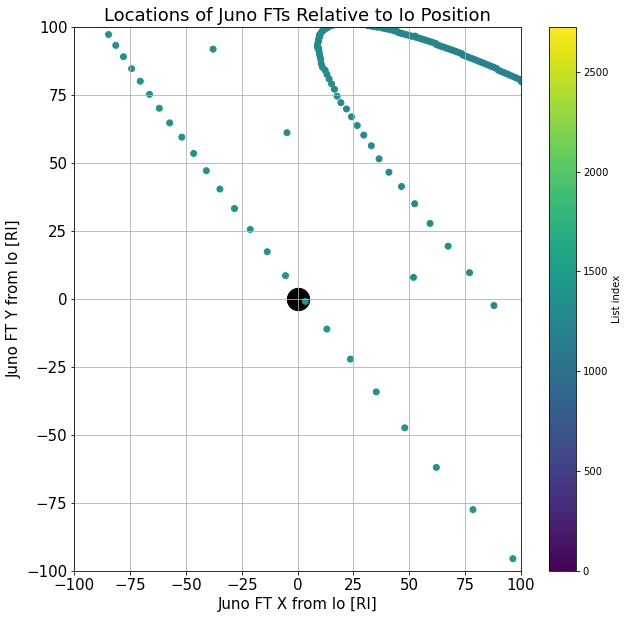

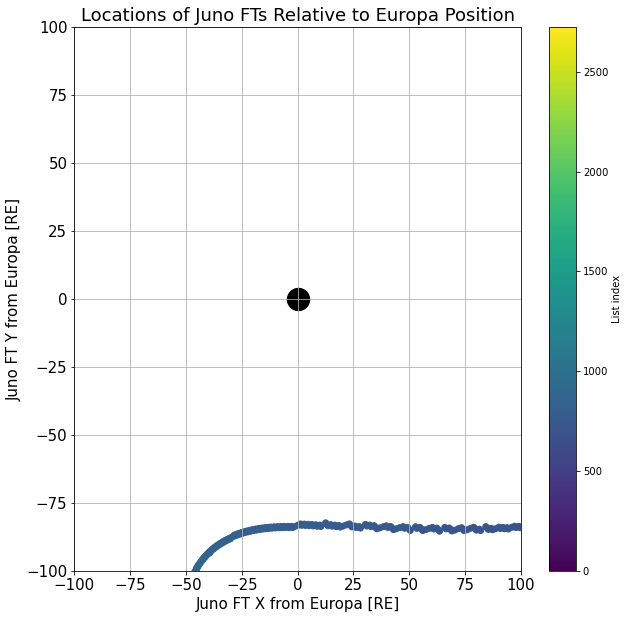

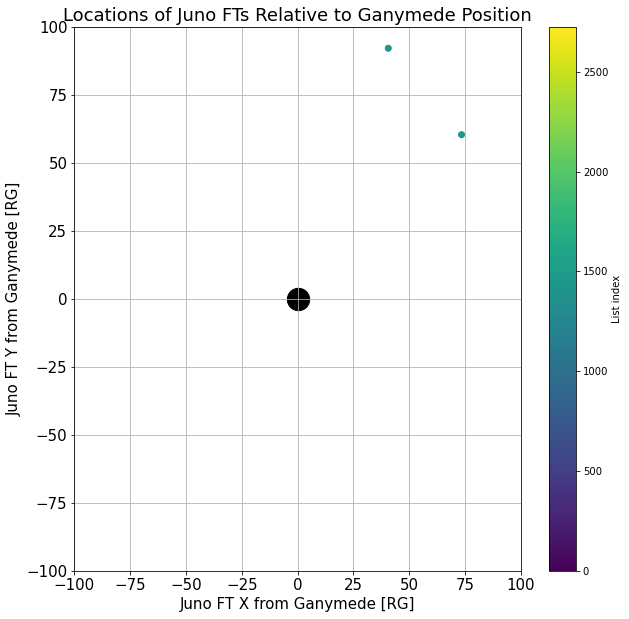

In [163]:
MLAT_list = np.array([MLAT_Io, MLAT_Europa, MLAT_Ganymede])
MLT_list = np.array([MLT_Io, MLT_Europa, MLT_Ganymede])
MShell_list = np.array([MShell_Io, MShell_Europa, MShell_Ganymede])

Juno_FT_X = MShell_Juno * np.cos(MLT_Juno*np.pi/12)
Juno_FT_Y = MShell_Juno * np.sin(MLT_Juno*np.pi/12)

for i, Sat in zip(np.arange(len(sat_list)), sat_list):
    Sat_X = MShell_list[i] * np.cos(MLT_list[i]*np.pi/12)
    Sat_Y = MShell_list[i] * np.sin(MLT_list[i]*np.pi/12)
    d_eq = np.sqrt((Juno_FT_X - Sat_X)**2 + (Juno_FT_Y - Sat_Y)**2) / R_list[i]

    # find d_LON and d_MSHELL
    d_MLT = MLT_Juno - MLT_list[i]
    d_MShell = MShell_Juno - MShell_list[i]

    plt.figure(figsize = (10,10))
    plt.title(f'Locations of Juno FTs Relative to {Sat} Position', fontsize = 18)
    plt.scatter(0, 0, c='k', s=500)
    plt.scatter((Juno_FT_X-Sat_X)/R_list[i], (Juno_FT_Y-Sat_Y)/R_list[i], c=np.arange(len(Sat_X)))
    plt.xlabel(f'Juno FT X from {Sat} [{R_labels[i]}]', fontsize = 15)
    plt.ylabel(f'Juno FT Y from {Sat} [{R_labels[i]}]', fontsize = 15)
    lim = 100
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.colorbar(label='List index')
    plt.grid(True)

    mc_mask = d_eq <= d_eq_VAR[i]
    # print all conjunction times and info
    print(f'{Sat} Magnetic Conjunctions in {year}\n-------------------------------------------')
    for j in np.arange(np.sum(mc_mask)):
        print(f'{j+1:2}) t = {datetime_pos[mc_mask][j]}')
        print(f'(Juno_MLT = {MLT_Juno[mc_mask][j]:0.2f}, {Sat}_MLT = {MLT_list[i][mc_mask][j]:0.2f}'
              f', Juno_MLAT = {MLAT_Juno[mc_mask][j]:0.2f}, {Sat}_MLAT = {MLAT_list[i][mc_mask][j]:0.2f}'
              f', Juno_M = {MShell_Juno[mc_mask][j]:0.2f}, {Sat}_M = {MShell_list[i][mc_mask][j]:0.2f})'
              f'\n(delta_MLT = {abs(d_MLT[mc_mask][j]):0.2f}'
              f', delta_M = {abs(d_MShell[mc_mask][j]):0.2f}'
              f', Eq_Dist = {d_eq[mc_mask][j]:0.2f} {R_labels[i]})')
    if int(np.sum((d_eq <= d_eq_VAR[i]))) == int(0):
        print('No conjunctions.')
        
    print('\n')

In [176]:
print(MLT_Ganymede[datetime_pos == datetime.datetime(2021,6,7,16,50,0)][0])
print(MLT_Juno[datetime_pos == datetime.datetime(2021,6,7,16,50,0)][0])

print(MShell_Ganymede[datetime_pos == datetime.datetime(2021,6,7,16,50,0)][0])
print(MShell_Juno[datetime_pos == datetime.datetime(2021,6,7,16,50,0)][0])

21.08
21.11
15.080905541989765
89.77520101405989
